In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [ ]:
df = pd.read_csv('/content/train.csv')
df.head()

,id,Date,Open,Close,Volume,Strategy
0,0,2015-06-01,66.208486,75.609978,298506300,Hold
1,1,2015-06-08,64.116235,74.443331,227974800,Hold
2,2,2015-06-15,47.701942,71.140831,250670900,Buy
3,3,2015-06-22,54.754816,72.881344,223614300,Hold
4,4,2015-06-29,48.031899,66.284718,406814900,Buy


The dataset as seen consists of 6 columns. Out of these, 3 columns (Date, Open, Volume) are independent columns and 2 columns (Close, Strategy) are dependent columns.

In [ ]:
df.tail()

,id,Date,Open,Close,Volume,Strategy
295,295,2021-01-25,81.284821,83.373498,117281600,Sell
296,296,2021-02-01,71.970249,85.294903,177655800,Sell
297,297,2021-02-08,71.784627,83.266453,146003500,Hold
298,298,2021-02-15,69.372333,81.026827,167762500,Hold
299,299,2021-02-22,69.618620,78.672007,332979200,Hold


In [ ]:
df.shape

(300, 6)

The dataset consists of 300 rows and 6 columns.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        300 non-null    int64  
 1   Date      300 non-null    object 
 2   Open      300 non-null    float64
 3   Close     300 non-null    float64
 4   Volume    300 non-null    int64  
 5   Strategy  300 non-null    object 
dtypes: float64(2), int64(2), object(2)
memory usage: 14.2+ KB


From the info of the dataset, we can see that all values are non-null in the dataset. Hence, the dataset is clean.

In [ ]:
df.describe()

,id,Open,Close,Volume
count,300.000000,300.000000,300.000000,3.000000e+02
mean,149.500000,75.977813,79.430489,1.866300e+08
std,86.746758,16.158343,13.878395,7.952792e+07
min,0.000000,40.269435,47.979353,5.991330e+07
25%,74.750000,64.872395,69.689227,1.324862e+08
50%,149.500000,79.805683,82.991900,1.715536e+08
75%,224.250000,88.342927,89.719145,2.201842e+08
max,299.000000,102.558322,103.119373,6.935702e+08


The description of the dataset tells us about the statistically important values such as: mean, standard deviation, minimum value, 25th percentile value, 50th percentile value, 75th percentile value and maximum value for all the numerical columns in our data (relevant: Open, Close, Volume).

In [ ]:
df['Date'] = pd.to_datetime(df['Date'])
df['Year'] = df['Date'].dt.year
df.set_index('Date', inplace=True)
df

,id,Open,Close,Volume,Strategy,Year
Date,,,,,,
2015-06-01,0,66.208486,75.609978,298506300,Hold,2015
2015-06-08,1,64.116235,74.443331,227974800,Hold,2015
2015-06-15,2,47.701942,71.140831,250670900,Buy,2015
2015-06-22,3,54.754816,72.881344,223614300,Hold,2015
2015-06-29,4,48.031899,66.284718,406814900,Buy,2015
...,...,...,...,...,...,...
2021-01-25,295,81.284821,83.373498,117281600,Sell,2021
2021-02-01,296,71.970249,85.294903,177655800,Sell,2021
2021-02-08,297,71.784627,83.266453,146003500,Hold,2021


Added a 'Year' column to the dataframe.

## Exploratory Data Analysis

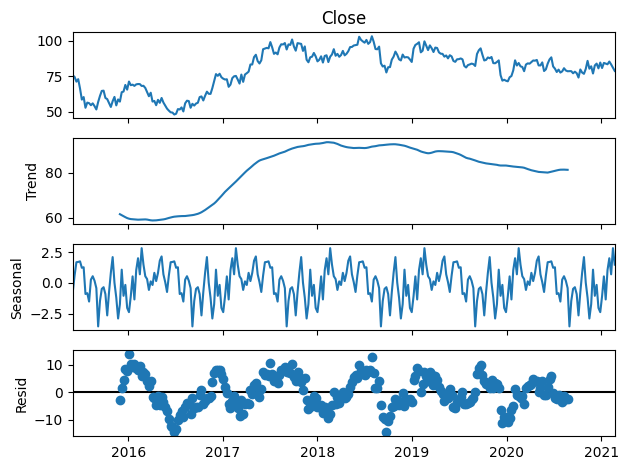

In [ ]:
import statsmodels.api as sm
#print(df['Close'])
decomposition = sm.tsa.seasonal_decompose(df['Close'], model='additive')
fig = decomposition.plot()
plt.show()


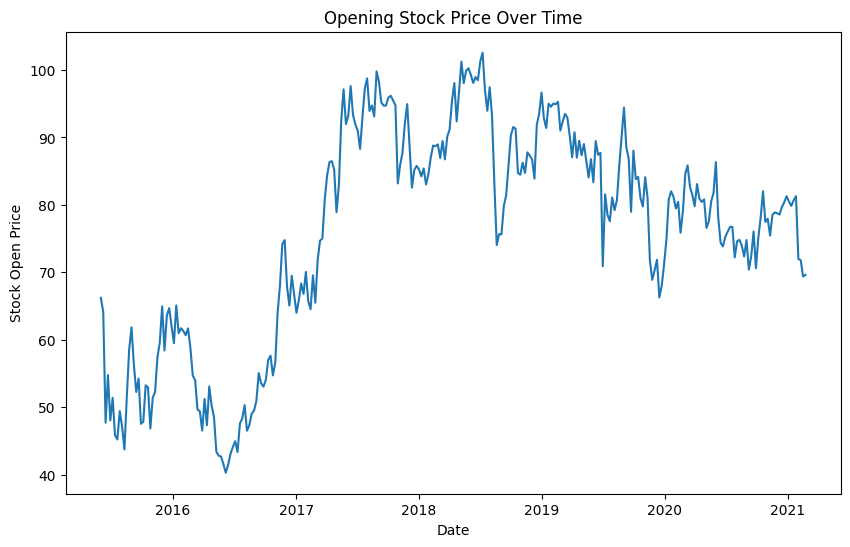

In [ ]:
plt.figure(figsize=(10, 6))
sns.lineplot(x='Date', y='Open', data=df)
plt.title('Opening Stock Price Over Time')
plt.xlabel('Date')
plt.ylabel('Stock Open Price')
plt.show()

The time series graph of Stock Open Price shows both a trend and seasonal behavior. The trend is an upward movement in the data over time. The seasonal behavior is a pattern of regular fluctuations in the data that repeats over a fixed period.

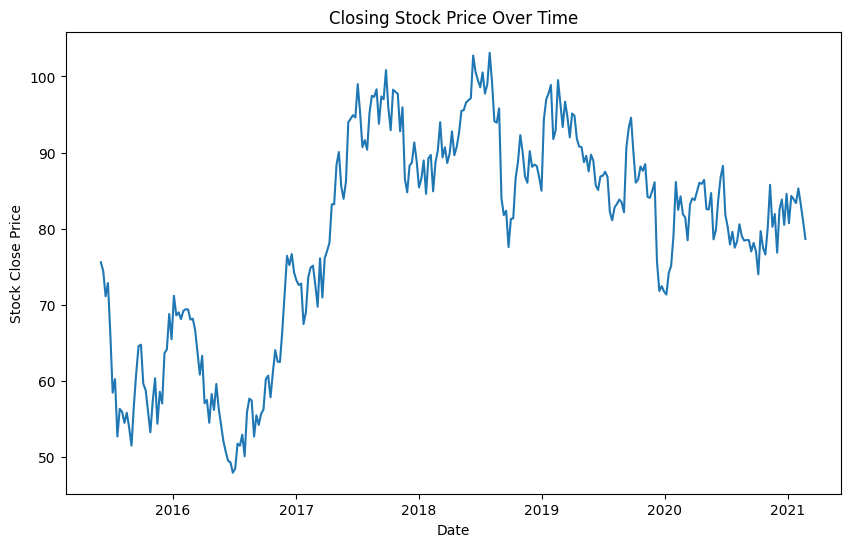

In [ ]:
plt.figure(figsize=(10, 6))
sns.lineplot(x='Date', y='Close', data=df)
plt.title('Closing Stock Price Over Time')
plt.xlabel('Date')
plt.ylabel('Stock Close Price')
plt.show()

The time series graph of Stock Close Price shows both a trend and seasonal behavior. The trend is an upward movement in the data over time. The seasonal behavior is a pattern of regular fluctuations in the data that repeats over a fixed period.

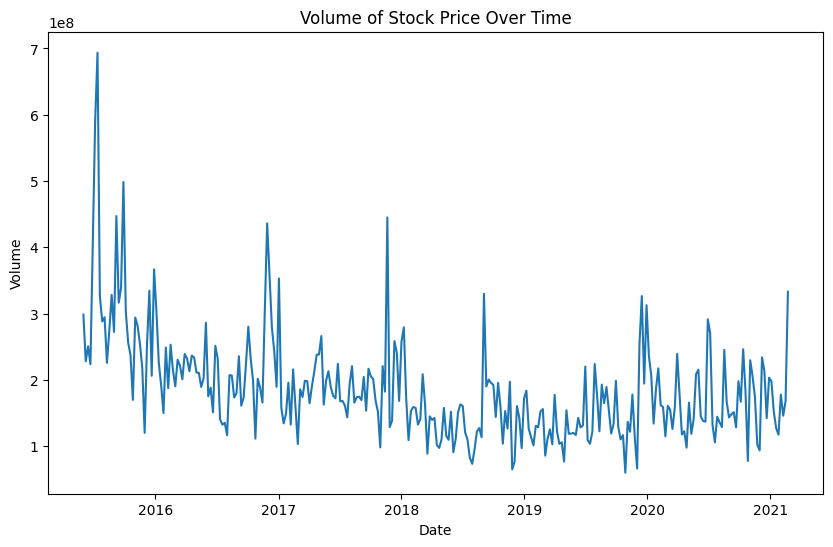

In [ ]:
plt.figure(figsize=(10, 6))
sns.lineplot(x='Date', y='Volume', data=df)
plt.title('Volume of Stock Price Over Time')
plt.xlabel('Date')
plt.ylabel('Volume')
plt.show()

The time series graph of volume of stock shows random behaviour.

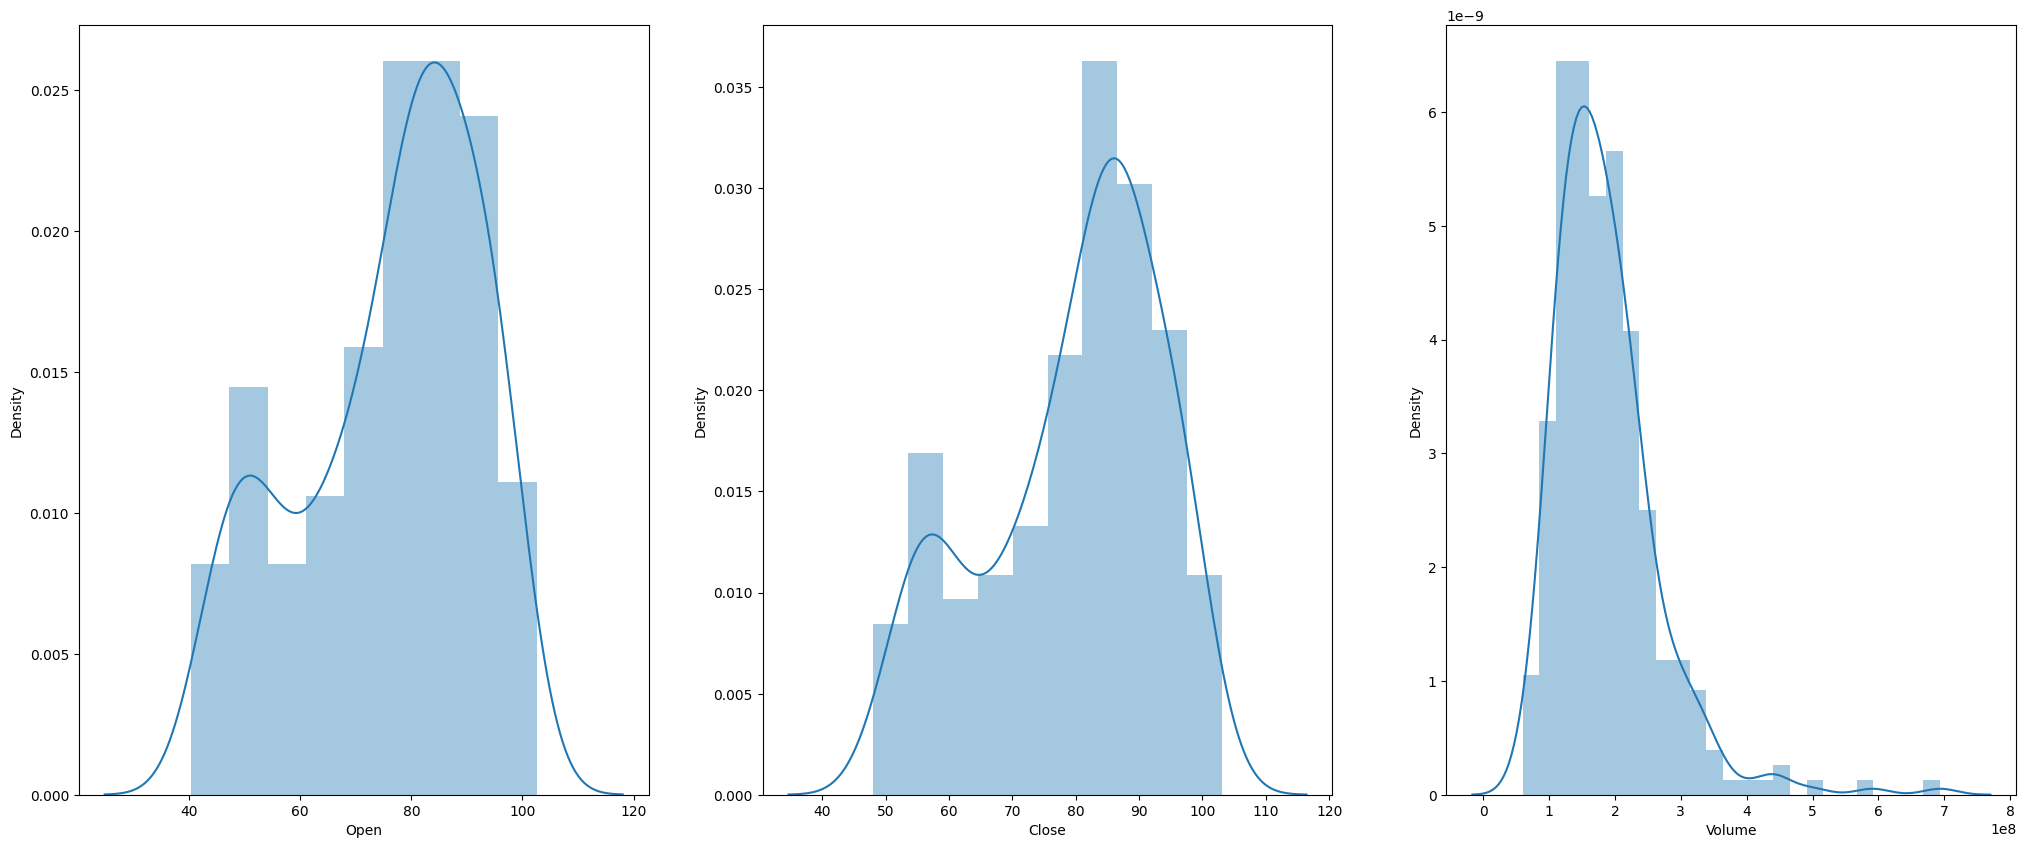

In [ ]:
features = ['Open', 'Close', 'Volume']

plt.subplots(figsize=(25,10))

for i, col in enumerate(features):
    plt.subplot(1,3,i+1)
    sns.distplot(df[col])
plt.show()

- The open and close price have similar distribution.
- The volume distribution is more skewed towards right which means that there are a few days in which trading happens in high volume (may be due to some event).
- Stock Open price has higher mean than close price distribution which means that stock open on higher than it closes on average.

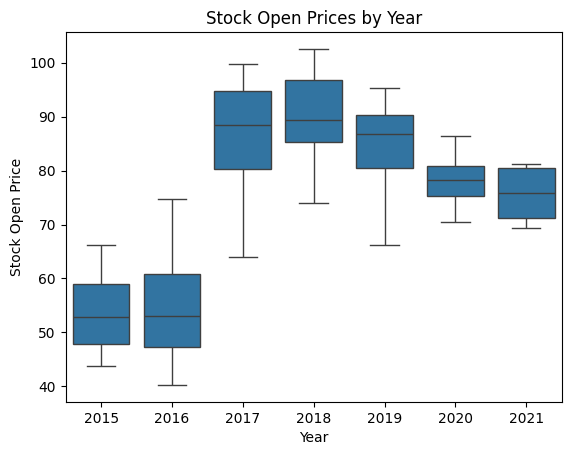

In [ ]:
sns.boxplot(x='Year', y='Open', data=df)
plt.title('Stock Open Prices by Year')
plt.xlabel('Year')
plt.ylabel('Stock Open Price')
plt.show()

- The stock open price has increased over time.
- The stock is volatile and that there is a good amount of trading activity at the open of the market.
- The median of stock open price has increased from around 55 to 80 in the past in the past 6 years.


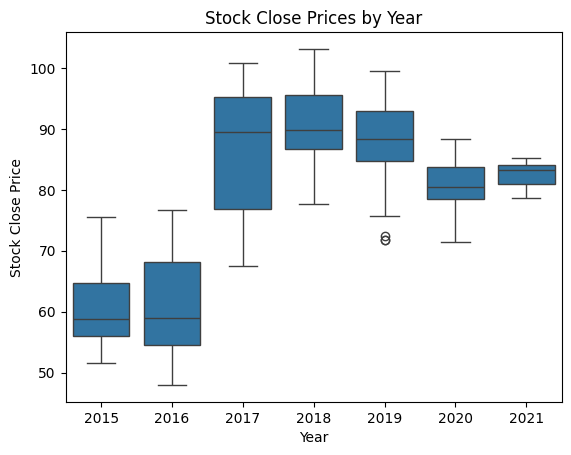

In [ ]:
sns.boxplot(x='Year', y='Close', data=df)
plt.title('Stock Close Prices by Year')
plt.xlabel('Year')
plt.ylabel('Stock Close Price')
plt.show()

- The stock close price has increased over time.
- The stock is volatile and that there is a good amount of trading activity at the open of the market.
- The median of stock closr price has increased from around 60 to 85 in the past in the past 6 years.

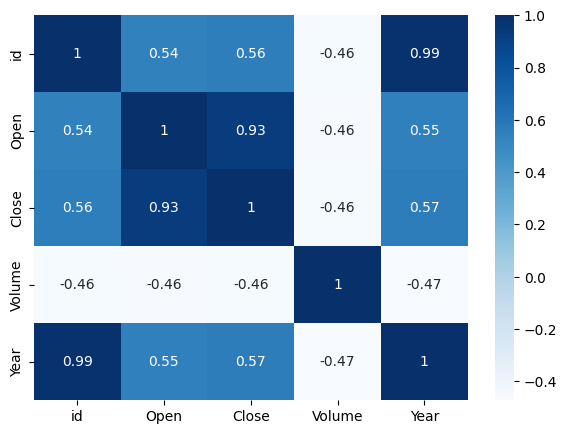

In [ ]:
plt.figure(figsize=(7,5))
sns.heatmap(df.corr(numeric_only=True),cmap='Blues',annot=True)
plt.show()

From the heatmap, these can be inferred:
- There is very high positive correlation between Open and Close stock prices.
- Some positive correlation between Open Price with Year and Close Price with Year.
- Some negative correlation between Volume with Year, Volume with Open price and Volume with Close price.

## Predicting Closing Price

In [ ]:
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
from math import sqrt

In [ ]:
df['Open_Lag1'] = df['Open'].shift(1)
df['Open_Lag2'] = df['Open'].shift(2)
df['Volume_Lag1'] = df['Volume'].shift(1)
df['Volume_Lag2'] = df['Volume'].shift(2)

df['Open_MA5'] = df['Open'].rolling(window=5).mean()
df['Open_MA10'] = df['Open'].rolling(window=10).mean()
df['Volume_MA5'] = df['Volume'].rolling(window=5).mean()
df['Volume_MA10'] = df['Volume'].rolling(window=10).mean()

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
to_row = int(len(df)*0.8)
training_data = list(df[0:to_row]['Close'])

testing_data = list(df[to_row:]['Close'])
len(training_data)

240

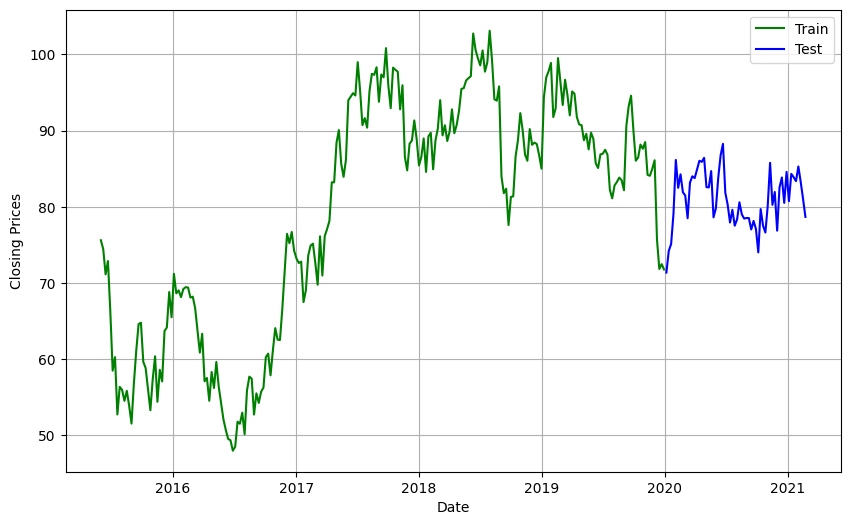

In [ ]:
plt.figure(figsize = (10,6))
plt.grid(True)
plt.xlabel('Date')
plt.ylabel('Closing Prices')
plt.plot(df[0:to_row]['Close'], 'green', label = 'Train')
plt.plot(df[to_row:]['Close'], 'blue', label = 'Test')
plt.legend()

In [ ]:
model_predictions = []
n_test_obser = len(testing_data)
#print(n_test_obser)
for i in range(n_test_obser):
    model = ARIMA(training_data, order=(4,1,0))
    model_fit = model.fit()
    output = model_fit.forecast()
    yhat = list(output)[0]
    model_predictions.append(yhat)
    actual_test_value = testing_data[i]
    training_data.append(actual_test_value)
    #print(yhat)

In [ ]:
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  299
Model:                 ARIMA(4, 1, 0)   Log Likelihood                -772.504
Date:                Thu, 25 Jul 2024   AIC                           1555.009
Time:                        15:39:30   BIC                           1573.494
Sample:                             0   HQIC                          1562.408
                                - 299                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1371      0.058     -2.352      0.019      -0.251      -0.023
ar.L2         -0.0302      0.061     -0.496      0.620      -0.150       0.089
ar.L3         -0.0244      0.057     -0.427      0.6

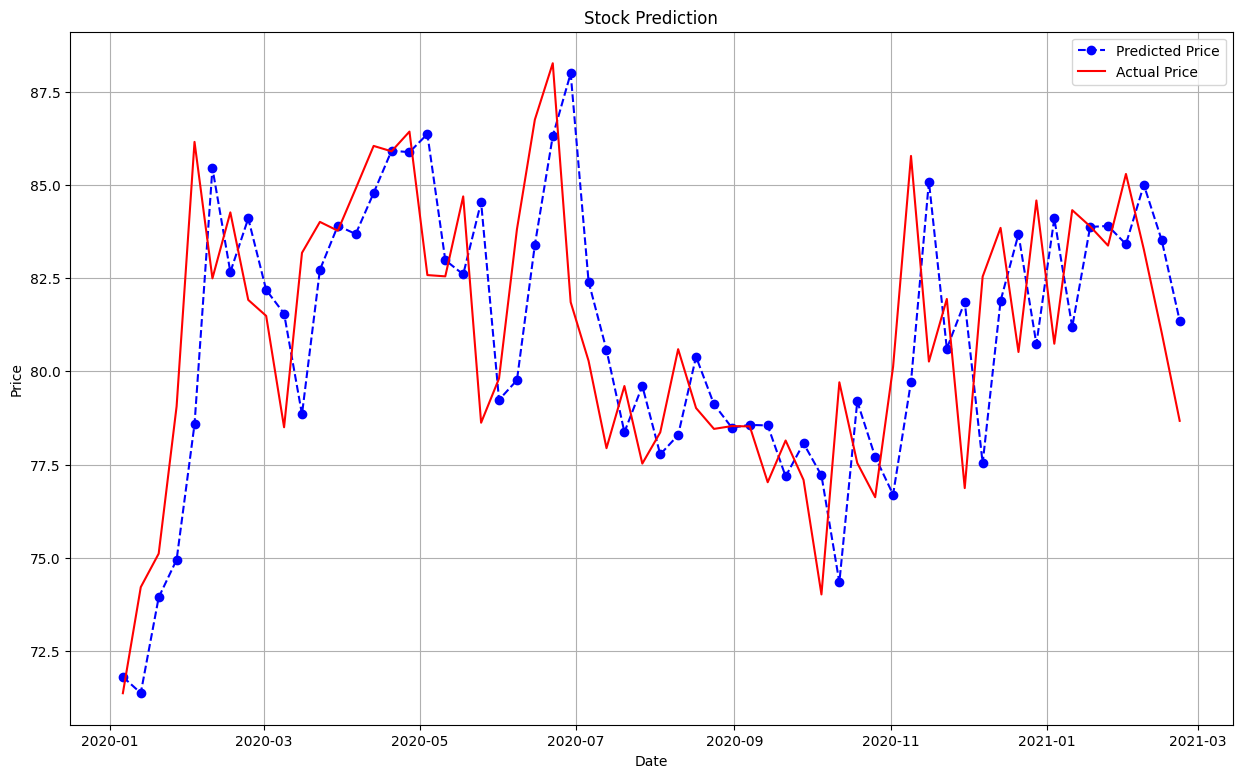

In [ ]:
plt.figure(figsize = (15,9))
plt.grid(True)
date_range = df[to_row:].index
plt.plot(date_range, model_predictions, color = 'blue', marker='o', linestyle='dashed', label = 'Predicted Price')
plt.plot(date_range, testing_data, color = 'red', label = 'Actual Price')

plt.title('Stock Prediction')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

#print(len(model_predictions[:-1]))


In [ ]:
from statsmodels.tsa.stattools import adfuller
ad_result=adfuller(df['Close'])

#H0: non stationary
#H1: stationary

def adfuller_test(close_price):
    res=adfuller(close_price)
    print("P-value:",res[1])
    if res[1]<=0.05:
        print("Strong evidence against null hypothesis. Data has no unit root and is stationary.")
    else:
        print("Weak evidence againt null hypothesis, time series is non-stationary.")

adfuller_test(df['Close'])

P-value: 0.37649446979222034
Weak evidence againt null hypothesis, time series is non-stationary.


In [ ]:
df_test = pd.read_csv('/content/test.csv')
df_test.head()

,id,Date,Open,Volume
0,0,2021-03-01,72.708331,205897600
1,1,2021-03-08,73.310886,214095600
2,2,2021-03-15,70.610119,151601700
3,3,2021-03-22,70.256017,193982500
4,4,2021-03-29,68.258324,220238400


In [ ]:
len(df_test)

100

params=model_fit.params
params

In [ ]:
import itertools
p=range(0,8)
q=range(0,8)
d=range(0,2)

pdq_comb=list(itertools.product(p,d,q))
len(pdq_comb)

128

In [ ]:
pip install pmdarima

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 19.1 MB/s eta 0:00:00


In [ ]:
from pmdarima import auto_arima
model=auto_arima(df['Close'],
                       start_p=1,
                       start_q=1,
                       start_d=0,
                       max_p=8,
                       max_q=8,
                       m=10,
                       seasonal=True,
                       max_d=2,
                       D=1,
                       trace=True,
                       error_action='ignore',
                       suppress_warnings=True,
                       stepwise=True)
print(model.summary())

Performing stepwise search to minimize aic
 ARIMA(1,0,1)(1,1,1)[10] intercept   : AIC=1535.694, Time=4.98 sec
 ARIMA(0,0,0)(0,1,0)[10] intercept   : AIC=2055.699, Time=0.13 sec
 ARIMA(1,0,0)(1,1,0)[10] intercept   : AIC=1611.110, Time=1.41 sec
 ARIMA(0,0,1)(0,1,1)[10] intercept   : AIC=1844.720, Time=1.78 sec
 ARIMA(0,0,0)(0,1,0)[10]             : AIC=2055.336, Time=0.22 sec
 ARIMA(1,0,1)(0,1,1)[10] intercept   : AIC=inf, Time=4.26 sec
 ARIMA(1,0,1)(1,1,0)[10] intercept   : AIC=1608.187, Time=4.46 sec
 ARIMA(1,0,1)(2,1,1)[10] intercept   : AIC=1537.436, Time=8.44 sec
 ARIMA(1,0,1)(1,1,2)[10] intercept   : AIC=1537.528, Time=8.87 sec
 ARIMA(1,0,1)(0,1,0)[10] intercept   : AIC=1699.200, Time=0.60 sec
 ARIMA(1,0,1)(0,1,2)[10] intercept   : AIC=1535.825, Time=5.36 sec
 ARIMA(1,0,1)(2,1,0)[10] intercept   : AIC=1579.946, Time=4.51 sec
 ARIMA(1,0,1)(2,1,2)[10] intercept   : AIC=inf, Time=14.92 sec
 ARIMA(0,0,1)(1,1,1)[10] intercept   : AIC=1845.212, Time=1.50 sec
 ARIMA(1,0,0)(1,1,1)[10] int

In [ ]:
df_test

,id,Date,Open,Volume
0,0,2021-03-01,72.708331,205897600
1,1,2021-03-08,73.310886,214095600
2,2,2021-03-15,70.610119,151601700
3,3,2021-03-22,70.256017,193982500
4,4,2021-03-29,68.258324,220238400
...,...,...,...,...
95,95,2022-12-26,57.048622,224994700
96,96,2023-01-02,60.569661,176020500
97,97,2023-01-09,61.446777,181478600
98,98,2023-01-16,55.447711,162471700


all_close=list(df['Close'])+list(df_test['Close'])
all_close

In [ ]:
endog=df['Close']
exog = df[['Open', 'Volume', 'Open_Lag1', 'Open_Lag2', 'Volume_Lag1', 'Volume_Lag2', 'Open_MA5', 'Open_MA10', 'Volume_MA5', 'Volume_MA10']]

#(2, 0, 0)x(2, 1, 0, 12)
mod=sm.tsa.statespace.SARIMAX(endog=endog,eexog=exog,order=(2,0,0),seasonal_order=(1,1,1,12))
model_fit=mod.fit()
model_fit.summary()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-MON will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-MON will be used.
  self._init_dates(dates, freq)


<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                       
============================================================================================
Dep. Variable:                                Close   No. Observations:                  300
Model:             SARIMAX(2, 0, 0)x(1, 1, [1], 12)   Log Likelihood                -766.120
Date:                              Thu, 25 Jul 2024   AIC                           1542.239
Time:                                      15:43:53   BIC                           1560.554
Sample:                                  06-01-2015   HQIC                          1549.579
                                       - 02-22-2021                                         
Covariance Type:                                opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.8586      0.058     14.709      0.000       0.744       0.973
ar.L2          0.1149      0.059      1.944      0.052      -0.001       0.231
ar.S.L12       0.1126      0.069      1.625      0.104      -0.023       0.248
ma.S.L12      -0.9999     31.610     -0.032      0.975     -62.954      60.955
sigma2        10.5453    333.239      0.032      0.975    -642.591     663.681
===================================================================================
Ljung-Box (L1) (Q):                   0.06   Jarque-Bera (JB):                 5.43
Prob(Q):                              0.80   Prob(JB):                         0.07
Heteroskedasticity (H):               0.81   Skew:                            -0.18
Prob(H) (two-sided):                  0.31   Kurtosis:                         3.57
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

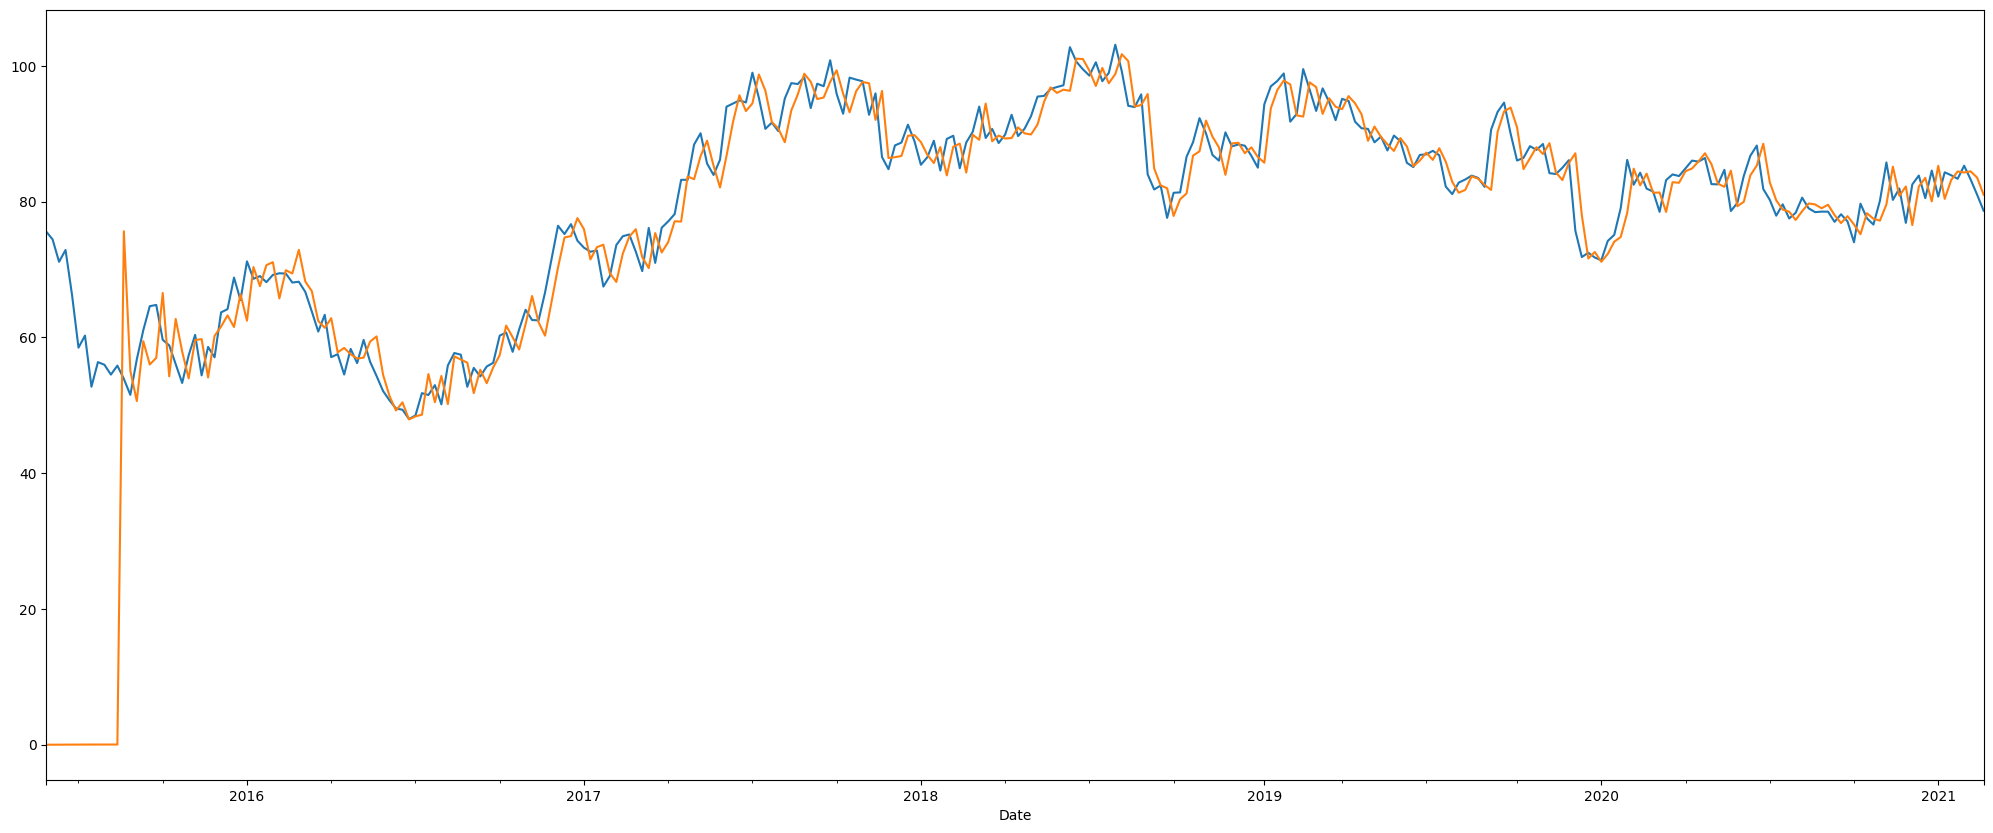

In [ ]:
df['Close'].plot(figsize=(25,10))
model_fit.fittedvalues.plot()
plt.show()

In [ ]:
predict=model_fit.predict(start=len(df),end=(len(df)+len(df_test)-1),exog=sm.add_constant(df_test[['Open','Volume']]))
df_test['Close']=predict.values

In [ ]:
df_test

,id,Date,Open,Volume,Close
0,0,2021-03-01,72.708331,205897600,78.977824
1,1,2021-03-08,73.310886,214095600,79.562699
2,2,2021-03-15,70.610119,151601700,79.069824
3,3,2021-03-22,70.256017,193982500,79.269690
4,4,2021-03-29,68.258324,220238400,79.430868
...,...,...,...,...,...
95,95,2022-12-26,57.048622,224994700,79.514594
96,96,2023-01-02,60.569661,176020500,78.859073
97,97,2023-01-09,61.446777,181478600,79.375722
98,98,2023-01-16,55.447711,162471700,79.230584


## CLASSIFICATION

In [ ]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler

#scaler = StandardScaler()

train=pd.Series(df['Close']).values

train=train.reshape((-1,1))

X_train, X_test, y_train, y_test=train_test_split(train,df['Strategy'],test_size=0.10,random_state=33)
#X_train_scaled = scaler.fit_transform(X_train)
#X_test_scaled = scaler.transform(X_test)
#X_train_squared = X_train_scaled ** 3
#X_test_squared = X_test_scaled ** 3

In [ ]:
param_grid = {
    'n_estimators': [10, 50, 100],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10]
}

In [ ]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(random_state=33,n_estimators=2)
model.fit(X_train, y_train)



y_pred = model.predict(X_test)

In [ ]:
#!pip install tslearn

In [ ]:
from sklearn.metrics import accuracy_score, classification_report


accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print(f"Classification Report:\n{report}")

Accuracy: 0.7
Classification Report:
              precision    recall  f1-score   support

         Buy       0.85      0.92      0.88        12
        Hold       0.55      0.60      0.57        10
        Sell       0.67      0.50      0.57         8

    accuracy                           0.70        30
   macro avg       0.69      0.67      0.67        30
weighted avg       0.70      0.70      0.69        30



In [ ]:
test=pd.Series(df_test['Close']).values
test=test.reshape((-1,1))
y_pred_test=model.predict(test)

In [ ]:
df_test['Strategy']=y_pred_test

In [ ]:
submission = pd.DataFrame()
submission["Date"] = df_test["Date"]

In [ ]:
sample_submission = pd.read_csv('/content/sample_submission.csv', index_col = 0)
sample_submission

,Date,Close,Strategy
id,,,
0,2021-03-01,445.681993,Buy
1,2021-03-08,646.184648,Buy
2,2021-03-15,169.994384,Buy
3,2021-03-22,194.417785,Buy
4,2021-03-29,398.390067,Buy
...,...,...,...
95,2022-12-26,414.176428,Sell
96,2023-01-02,670.585028,Sell
97,2023-01-09,13.361250,Sell


In [ ]:
submission["Close"] = df_test["Close"]
submission["Strategy"] = df_test['Strategy']
submission.set_index(sample_submission.index, inplace=True)

In [ ]:
submission.head()

,Date,Close,Strategy
id,,,
0,2021-03-01,78.977824,Buy
1,2021-03-08,79.562699,Hold
2,2021-03-15,79.069824,Buy
3,2021-03-22,79.269690,Buy
4,2021-03-29,79.430868,Hold


In [ ]:
submission.to_csv('submission.csv', index=True)